In [1]:
include("../functions.jl")
println("Avaliable threads: ", Threads.nthreads())

Avaliable threads: 32


In [11]:
## Initialize 

branchN = 100
a1Vals = collect(range(0.01, 0.23, branchN + 1))

# Define the values for the parameters
N = 36
L = π
b = 0.1

# Create an instance of the Constants struct
constants = eulerBernoulliConstants(N, L, b)

# initialize wave speed and wave number 
k1 = 1*π/constants.L
cInitial = c0(k1, constants)

# initial guess 
initial_guess = (1e-16).*ones(branchN+1, constants.N+2)
initial_guess[1,1:4] = [cInitial, 1.0, a1Vals[1], 1e-16]

4-element Vector{Float64}:
 0.665752044634463
 1.0
 0.01
 1.0e-16

Found 1 duplicate saved results. Deleting (overwrite = true) and re-computing.
Branch point 10 of 100, 4 iterations.
Branch point 20 of 100, 4 iterations.
Branch point 30 of 100, 4 iterations.
Branch point 40 of 100, 5 iterations.
Branch point 50 of 100, 6 iterations.
Branch point 60 of 100, 8 iterations.
Branch point 70 of 100, 101 iterations.
Branch point 80 of 100, 139 iterations.
Branch point 90 of 100, 1000 iterations.
Branch point 100 of 100, 1000 iterations.
Saved solution branch to eulerBernoulli_2410231740_N36.jld2
218.074987 seconds (539.21 M allocations: 99.815 GiB, 9.17% gc time)


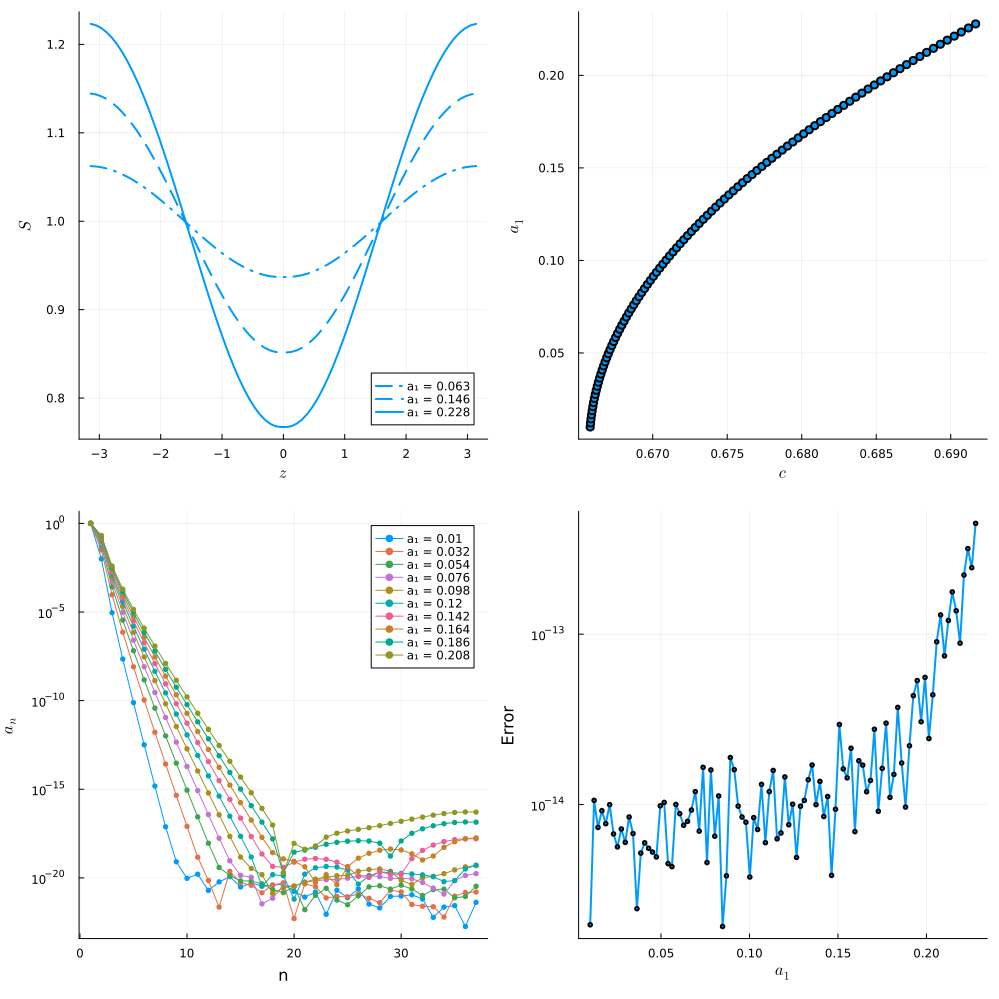

In [12]:
## Compute solution branch
@time solutions, constants, metadata = bifurcation(initial_guess, a1Vals, branchN, constants, tol = 1e-14, solver = :NLSolver, max_iter = 1000, overwrite = true);

plotEverything(solutions, constants, metadata)

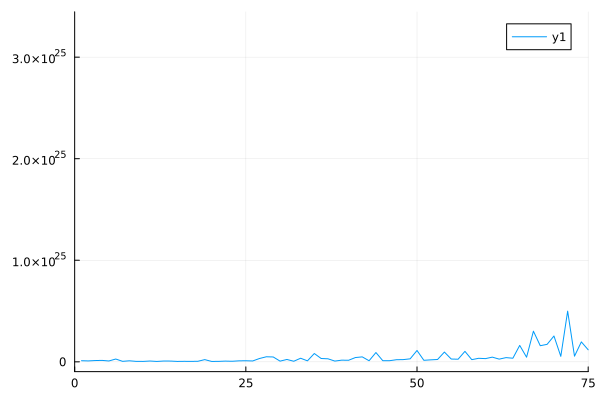

In [ ]:
plot(metadata["condition_numbers"])
# xlims!(0,75)

Plotting all 17 branches


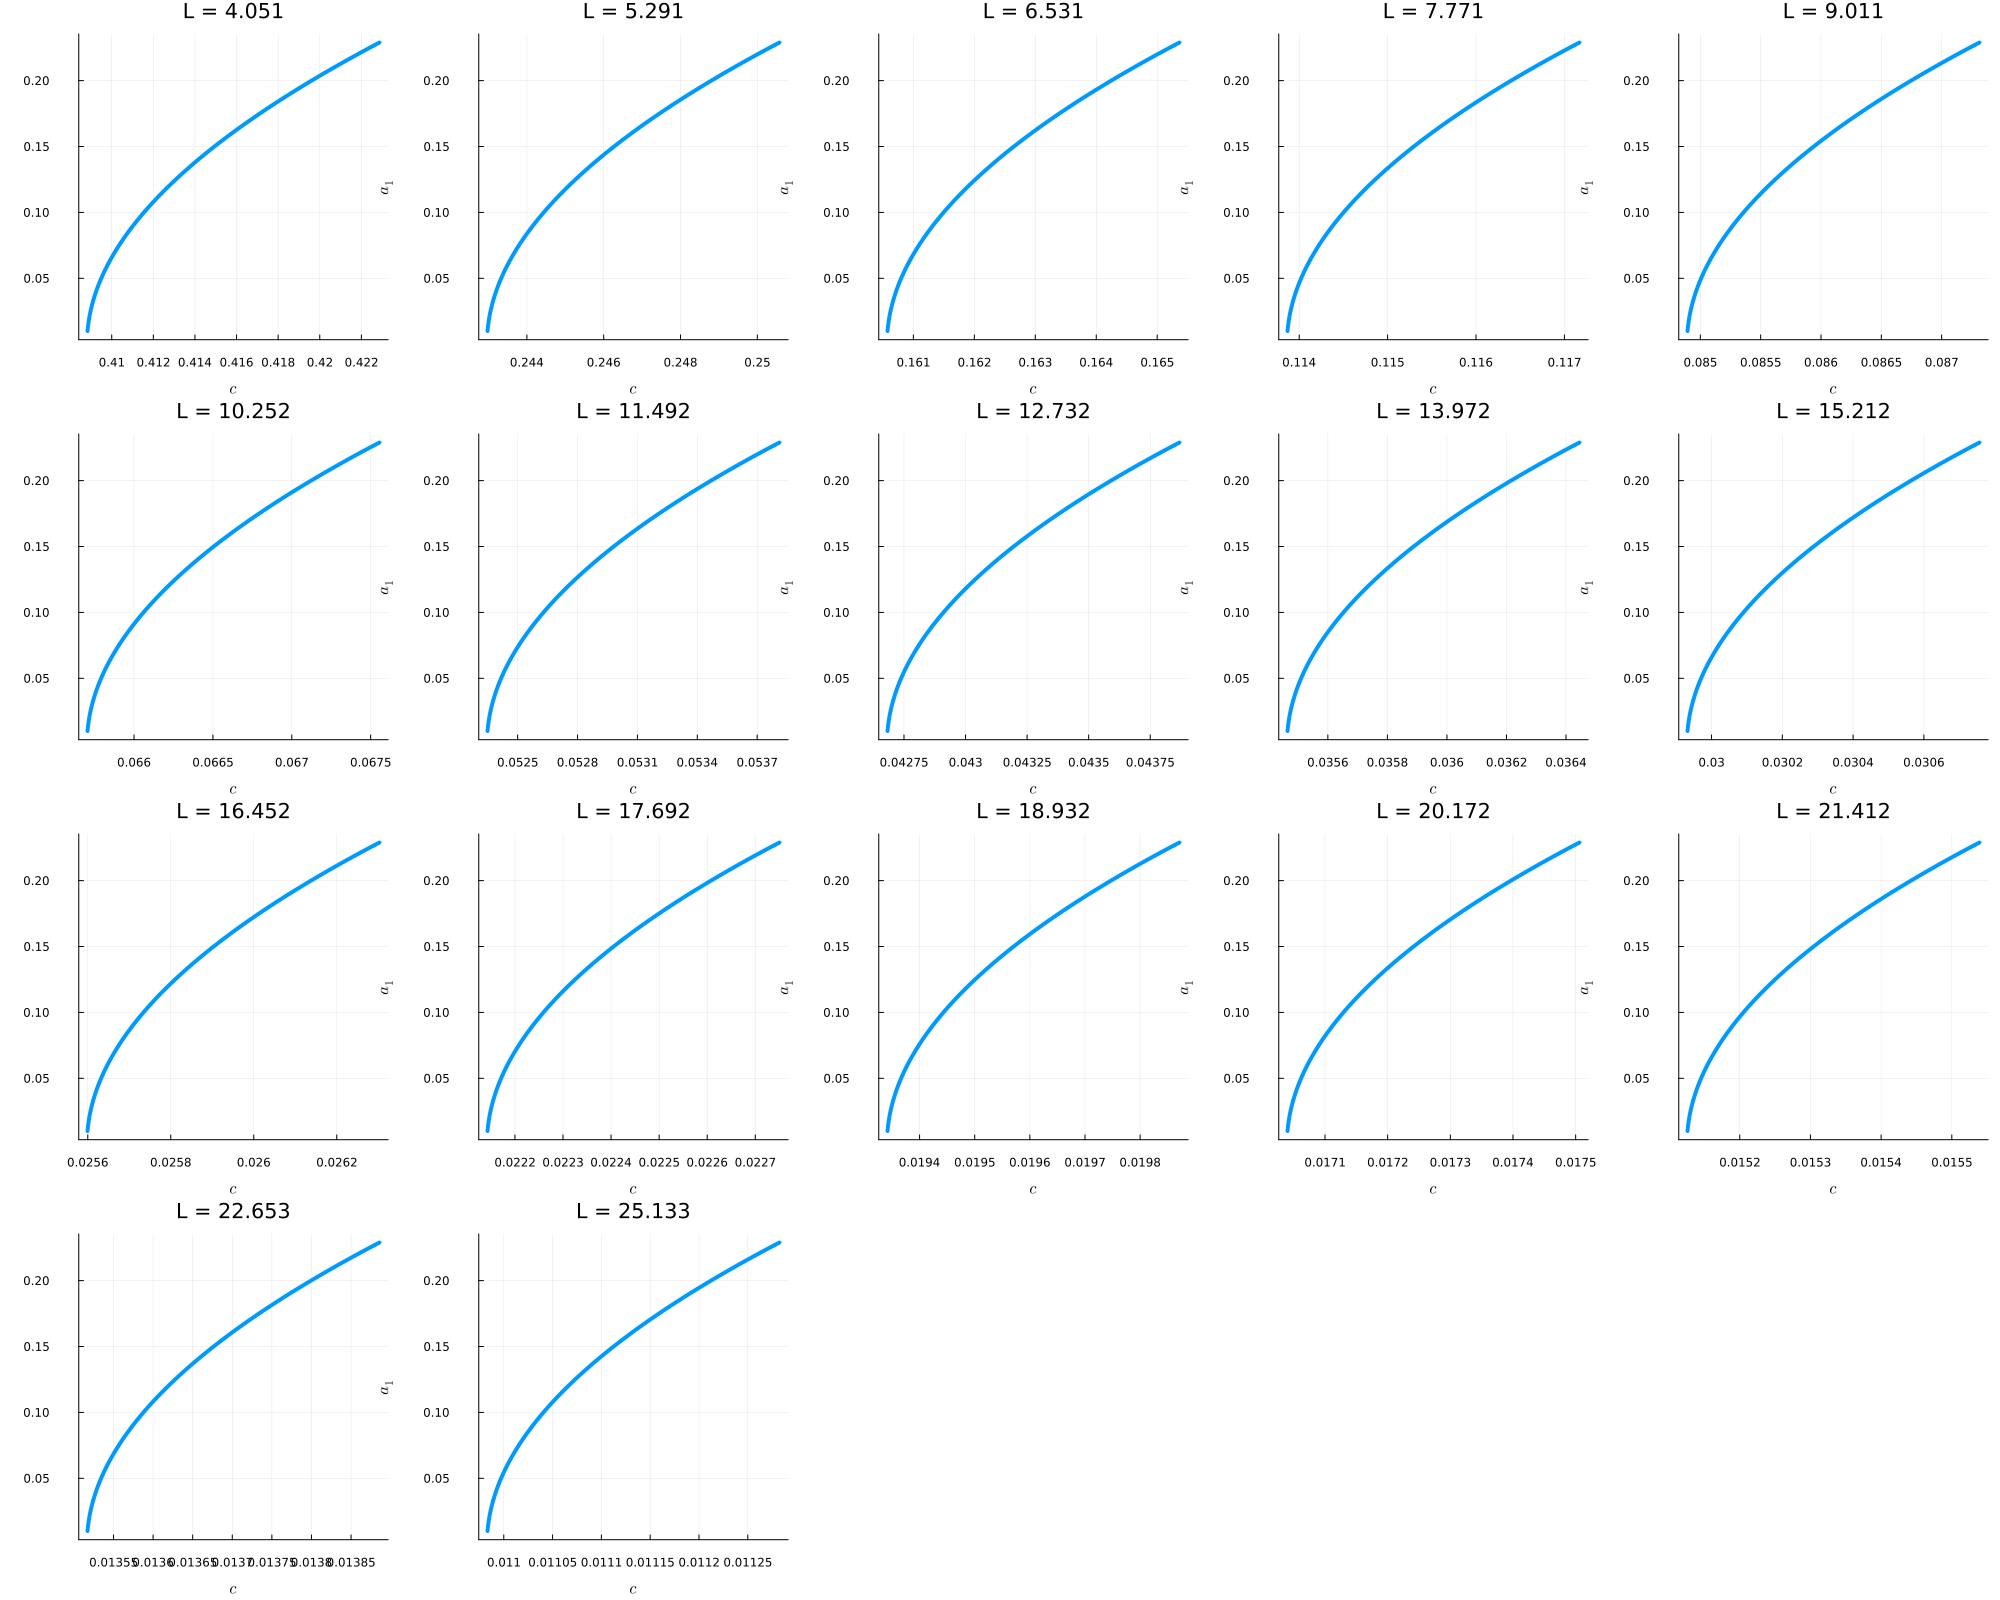

In [2]:
path = "/home/karnav/Documents/kylindros/results/experiments/eb_grid_search"
plotBranchVariationsSubplots(path)